# Intro.

훈련 데이터로부터 가중치 파라미터의 최적값을 자동으로 찾는 것을 `학습`이라고 부른다.  
신경망의 학습을 돕기 위한 지표를 `손실 함수(혹은 비용 함수)`라고 부른다. 손실 함수를 최소화 시키는 가중치 파라미터를 찾는 것이 학습이 하는 일이다.  

쉽게 생각하면 채점 기준을 두고 문제를 가장 적게 틀리는 방향으로 이동시키는거라고 보면 쉽다.  

# 1. 데이터에서 학습

가중치를 자동으로 조정해서 학습하는 것을 공부해보자.  

## 1.1. 데이터 주도 학습

보통은 어떤 문제를 해결할 때 패턴을 찾아낼 때에는 사람이 개입한다. 기계학습은 이 사람의 개입을 최소화하고 수집한 데이터에서 패턴을 찾으려고 한다.  
딥러닝은 사람의 개입이 아주 배제되는 중요한 특성을 가지고 있다.  

우리가 학습하려는 손글씨를 생각해보자.  

이미지에서 특징을 추출(feature extraction)하고 이 특징의 패턴을 학습시키는 방법이 있다. 여기서 특징이란 입력 데이터의 중요한 부분을 추출하는 것을 의미한다.  
컴퓨터 비전 분야에서 HOG, SIFT 등이 바로 그런 것들이다. 이미지의 특징을 벡터로 기술해서 이를 학습시키는 것이다.  

이러한 과정은 당연히 사람이 한다. 이 받은 벡터를 기반으로 예측하는 모델을 만드는 것을 기계가 해준다.  
즉, 문제에 필요한 피쳐를 뽑아내어 사용하지 않으면 학습 품질이 굉장히 떨어진다.  

그럼 딥러닝은 장점이 뭘까?? 보통은 다음과 같은 과정을 거쳐 문제를 해결하려고 한다.  

1. 피쳐 추출
2. 기계 학습(SVM, KNN) 등 선택

하지만 딥러닝은 신경망이라는 컨텍스트 내에서 문제를 해결할 수 있다는 점이 다르다.  

가공된 벡터를 넣어 주어진 데이터만 가지고 학습을 하여 패턴을 찾으려고 하는 것이다. `end-to-end` 학습을 하는 것이다.  

# 2. 손실 함수

머신러닝에서는 손실 함수라는 학습 상태를 측정할 수 있는 기준을 두고 이를 중심으로 파라미터를 조절한다. 신경망의 경우에는 가중치 파라미터가 조절 될 것이다.  
이러한 손실 함수에는 여러가지 방법이 있다.  

- MSE(Mean Squared Error)
- RMSE(Root MSE)
- R^2
- Adjusted R^2
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- Cross Entropy

여기서는 평균 제곱 오차 MSE와 크로스 엔트로피를 학습한다.  

## 2.1. Mean Squared Error(평균 제곱 오차)

평균 제곱 오차의 수식을 보자.  

![mse](./assets/04/1.png)

여기서 y_i는 관측 값, 그리고 y_i에 hat(^) 기호가 붙은 친구는 예측 값을 의미한다. 그리고 이 차를 제곱한 합의 평균을 내는 방법이 MSE이다.  
왜 굳이 제곱을 하냐하면 부호를 양수로 통일하기 위함이다. 음수나 양수나 어쨌든 실제 기대값에서 못미친다는 사실은 변함이 없기 때문에 제곱을 해도 무관하기 때문이다.  



In [2]:
import numpy as np

def mean_squared_error(y, t):
    return np.sum((y - t) ** 2) / y.size

# the answer is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# let the y be output of neural network
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.019500000000000007
0.11950000000000001


답은 2였고 신경망의 출력 결과는 각각 2가 유력, 7을 유력이라고 예측했다.  
답을 맞춘 전자는 손실 함수의 값이 낮고, 답을 틀린 후자는 손실 함수의 값이 높다.  

이를 바탕으로 추론을 진행하는 것이다.  

참고로 신경망 출력 결과의 합이 1이라는 사실도 눈여겨보자.  

## 2.2. Cross Entropy Error(교차 엔트로피 오차)

수식을 보자.  

![mse](./assets/04/2.png)

여기서 로그 안의 y_i는 신경망에서 예측한 값, 밖에 있는 y_i는 정답 레이블을 의미한다.  
정답 레이블은 `One-Hot encoding` 즉, 정답 1을 제외하고는 0으로 인코딩 되어 있기 때문에 사실상 정답일 때의 값이 전체 값을 결정하게 되는 구조이다.  

로그 함수의 특성 상 x가 1일 때 y는 0이되고, x가 0에 가까워 질 수록 y 값은 커진다.  

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# the answer is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# let the y be output of neural network
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


이와 같이 실제로 판단이 잘 되는 모습을 볼 수 있다. 틀려먹은 친구일 수록 값이 크다.  

## 2.3. minibatch

머신 러닝은

- 훈련 데이터에 대한 손실 함수의 값을 구하고
- 그 값을 줄이는 파라미터를 찾음

을 과정으로 한다. 문제는 데이터가 적으면 상관 없는데 빅 데이터에 대한 것이라면?  
데이터 일부를 추려 전체의 근사치로 이용하는 방법이 있다. (표본과 경향성에 대한 이야기임)  

이렇게 일부를 추려 학습시키는 것을 미니배치 학습이라고 한다.  

배치 프로세스는 컴퓨터에게 있어서도 상당히 유리하다.  

## 2.4. Cross Entropy for batch

배치용 크로스 엔트로피를 구현해보자.  

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

## 2.5. 왜 손실 함수인가?

정확도라는 값을 놔두고 굳이 손실 함수 값을 취하는 이유는 무엇일까?  
신경망 학습에서는 최적의 파라미터를 탐색 할 때 손실 함수의 값을 최소화 시키는 파라미터를 찾는다. 이 때 파라미터의 미분 값을 기반으로 갱신을 한다.  

이는 신경망의 활성화 함수로 계단 함수를 채택하지 않는 이유와도 맞는다.

# 3. 수치 미분

경사 하강법에서는 경사 값을 기준으로 나아갈 방향을 정한다.  

## 3.1. 미분

![derivative](./assets/04/3.png)

순간적인 변화량을 의미하는 미분에 대한 수식이다. 이를 파이썬의 장점을 사용해서 순진하게 구현해보면 다음과 같다.  

In [5]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

이 방법에는 두 가지 문제가 있다.  

- 반올림 오차(rounding error)
- 해석적 해와는 다르기 수치적 근사이므로 오차를 줄이기 위해 차분 계산을 해야함

개선된 버전을 보자


In [6]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

## 3.2. 수치 미분

다음과 같은 함수를 가정해보자.  

```text
f(x) = 0.01x^2 + 0.1x
```

이 함수를 미분하면 다음과 같다.  

```text
f'(x) = 0.02x + 0.1
```

이제 이를 바탕으로 코드로 증명해보자.  

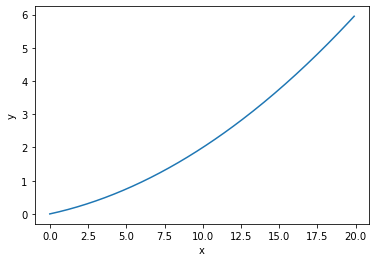

In [7]:
import numpy as np
import matplotlib.pylab as plt

def f1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = f1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

이 함수의 미분값을 해석적으로 구해보고 수치적으로 구해보자. 5인 경우와 10인 경우에 대해 구해보자.  

In [8]:
print(numerical_diff(f1, 5)) # 해석적으로 .2
print(numerical_diff(f1, 10)) # 해석적으로 .3

0.1999999999990898
0.2999999999986347


정확하지는 않지만 거의 똑같다고 볼 수 있다. 실제로 접선을 그어보자.

0.1999999999990898


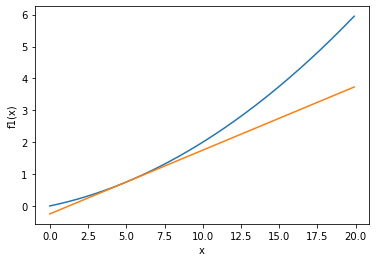

In [9]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = f1(x)
plt.xlabel("x")
plt.ylabel("f1(x)")

tf = tangent_line(f1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 3.3. 편미분

변수가 여러개인 함수의 경우 미분하는 방법을 고민해보자.  

```text
f(x, y) = x^2 + y^2
```

이를 그려보자

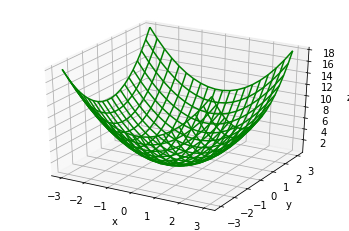

In [10]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

def f2(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)

X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

그물망 같은 친구가 나온다. 이를 도대체 어떻게 미분하란 말인가. 변수가 두 개다 심지어.  
따라서 이를 미분하기 위해서는 `어떤 변수인가?`에 주목해야한다. 이것이 바로 편미분이다.  

쉬운 설명을 하자면 한 축 즉, 한 변수를 고정하고 다른 변수에 대해 미분을 수행하는 것을 의미한다.  
즉 직관적으로 보자면 칼로 자른 단면의 함수에 대해 미분한다고 생각하면 마음이 편하다.  

코드로 이해해보자.  

x가 3, y가 4인 경우 x에 대해 미분한다고 가정해보자.  

In [11]:
numerical_diff(lambda x: x * x + 4.0 ** 2, 3.0)

6.00000000000378

x가 3, y가 4인 경우 y에 대해 미분한다고 가정해보자.  

In [12]:
numerical_diff(lambda x: 3.0 ** 2.0 + x * x, 4.0)

7.999999999999119

해석적 해에 근사하는 값이 나왔다.  

# 4. 경사(Gradient)

그렇다면 두 변수 x, y에 대한 편미분을 동시에 계산하기 위해서는 어떻게 해야할까?  
이 편미분 값에 대한 벡터를 그라디언트(Gradient)라고 한다.  

In [13]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

def f2(x):
    return np.sum(x ** 2)

print(numerical_gradient(f2, np.array([3.0, 4.0])))
print(numerical_gradient(f2, np.array([0.0, 2.0])))
print(numerical_gradient(f2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


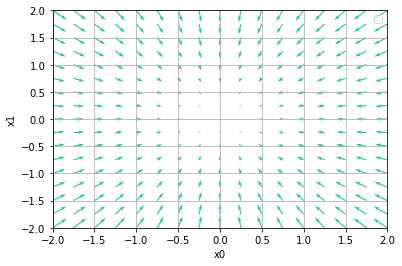

In [14]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#22cc88")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

## 4.1. Gradient Descent

학습 단계에서 optimal parameter를 찾는 것이 목표이다. 여기서 optimal은 손실 함수의 값을 최소로 만드는 매개변수의 값이다.  
이 최소값을 찾으려는게 경사하강법이다.  

하지만 주의할 점이 있다. 기울기가 가리키는 방향이 함수의 최소값이 있다는 보장은 없다는 점이다.  

![grad_desc](./assets/04/4.png)

에타는 갱신할 양을 의미한다. 신경망에서는 학습률(Learning Rate)이다.  
생소해보이는 친구들이라 간단하게 말하면 미분값에 아주 작은 값인 학습률을 곱한만큼 이동해 내려간다고 생각하면 쉽다.  
이 값이 작은 이유는 커지는 경우 `Gradient Explosion`이라는 현상이 발생해 발산하여 학습을 제대로 못하는 현상이 생길 수 있다.  

그렇다고 마냥 작은 값이 좋을까? 아니다. 학습률 값이 작아지면 최저점까지 찾아가기 위한 스텝수가 늘어난다. 즉 학습 속도가 떨어진다.  
이러한 이유 때문에 AdaGrad(Adaptive Grad) 같은 것이 사용된다. 이 방법은 변위를 누적하여 적절한 속도를 만든다.  

In [15]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    log = []
    
    for i in range(step_num):
        log.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(log)

X = np.array([-3.0, 4.0])
r, _ = gradient_descent(lambda x: np.sum(x ** 2), X, lr=0.01, step_num=100)
print(r)

[-0.39785867  0.53047822]


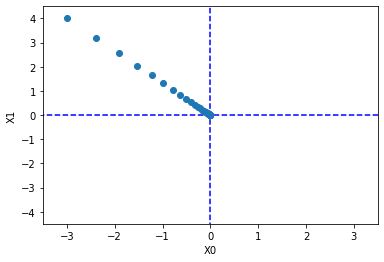

In [16]:
import numpy as np
import matplotlib.pylab as plt

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 200
x, x_history = gradient_descent(lambda x: np.sum(x ** 2), init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률 같은 파라미터를 하이퍼파라미터(hyper parameter)라고 부른다. 가중치 파라미터와 달리 직접 설정해주어야 하며 실험적 값을 찾아봐야 한다.  

## 4.2. 신경망의 Gradient

가중치 파라미터에 대한 손실 함수의 기울기를 위해 이걸 공부한 것이다.  

In [17]:
import sys, os
import numpy as np

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss
    
net = simpleNet()
print(net.W)

[[-0.55449731  1.26471286 -0.31583563]
 [-0.22407335 -0.10263187  1.2553097 ]]


In [18]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([-0.5343644 ,  0.66645903,  0.94027735])

In [19]:
np.argmax(p)

2

In [20]:
t = np.array([0, 1, 0])
net.loss(x, t)

0.9616164235400566

In [21]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.06902642 -0.37063528  0.30160887]
 [ 0.10353963 -0.55595292  0.4524133 ]]


# 5. 학습 알고리즘 구현

신경망 학습 절차

1. 미니배치
    - 훈련 데이터 중 일부를 무작위로 갖고옴. 이 선별된 데이터를 미니배치라고 부르며, 이 미니배치의 손실 함수 값을 최소화 시키는 것이 목표
2. 기울기 산출
    - 손실 함수 값을 줄이기 위해 가중치 파라미터의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시함
3. 파라미터 업데이트
    - 가중치 파라미터를 기울기 방향으로 아주 조금 변경함
4. 반복
    - 1~3단계 반복
    
이렇게 데이터를 미니배치로 무작위로 선정하기 때문에 SGD(Stochastic Gradient Descent)라 부른다.  


## 5.1. 2층 신경망 클래스 구현

In [22]:
import sys, os
from common.functions import *
from common.gradient import numerical_gradient

In [23]:
class TwoLayeredNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['w1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['w2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_w = lambda w: self.loss(x, t)
        
        grads = {}
        grads['w1'] = numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = numerical_gradient(loss_w, self.params['b2'])
        
        return grads

In [24]:
net = TwoLayeredNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['w1'].shape)
print(net.params['b1'].shape)
print(net.params['w2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [25]:
dummy_batch = np.random.rand(100, 784)
y = net.predict(dummy_batch)

In [27]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads['w1'].shape)
print(grads['b1'].shape)
print(grads['w2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


## 5.2. 미니배치 학습 구현

고우

In [28]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [29]:
train_loss_list = []
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayeredNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 